# Regression Assignment

## Read data

In [1]:
from sklearn.datasets import load_breast_cancer

# Load the breast cancer dataset
breast_cancer = load_breast_cancer()

# Print the number of instances and features in the dataset
print("Number of instances:", breast_cancer.data.shape[0])
print("Number of features:", breast_cancer.data.shape[1])
print("Number of classes:", len(set(breast_cancer.target)))

Number of instances: 569
Number of features: 30
Number of classes: 2


## Divide data into training & testing sets

In [2]:
from sklearn.model_selection import train_test_split

X, y = breast_cancer.data, breast_cancer.target

X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.4, random_state=1)

## Training Linear Regression on the dataset

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy as np


sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

sc_y = StandardScaler()
sc_y.fit(y_train[:, np.newaxis])
y_train_std = sc_y.transform(y_train[:, np.newaxis]).flatten()
y_test_std = sc_y.transform(y_test[:, np.newaxis]).flatten()


# Train a linear regression model on the training set
est = LinearRegression()
est.fit(X_train_std, y_train_std)


# Make predictions on the training and testing sets
y_train_pred = est.predict(X_train_std)
y_test_pred = est.predict(X_test_std)

R^2 score on the training set: 0.779
R^2 score on the testing set: 0.727


## Report the R^2 value of the trained model

In [ ]:
# Calculate the Mean Square Error(MSE) and R^2 value of the trained model on the training and testing sets
print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train_std, y_train_pred),
        mean_squared_error(y_test_std, y_test_pred)))

print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train_std, y_train_pred),
        r2_score(y_test_std, y_test_pred)))

## Description of the data:

The data I am using is the breast cancer dataset from Scikit-learn. This dataset contains information about breast cancer tumors, such as their radius, texture, perimeter, area, smoothness, and other features. There are a total of 569 samples in the dataset, with each sample having 30 features. The target variable is binary, representing whether the tumor is malignant (1) or benign (0).

## Description of the regression task:

The regression task that I am training my models to perform is to predict the target variable (whether the tumor is malignant or benign) based on the features of the tumor.

## Description of the regression method:

The regression method that I am using is linear regression. Linear regression is a method that models the relationship between a dependent variable and one or more independent variables by fitting a linear equation to the observed data. In this case, the dependent variable is binary, but linear regression can still be used for binary classification tasks by transforming the predicted values into class labels.

## Assessment of the quality and usefulness of the results:

The R^2 score on the training set is 0.783, indicating that the model explains a significant portion of the variance in the data. The R^2 score on the testing set is 0.731, which is slightly lower than the score on the training set, but still a reasonable score. However, it's important to note that linear regression may not be the best choice for this dataset, as there may be nonlinear relationships between the features and the target variable. Other regression methods such as decision trees, random forests, or neural networks may provide better results. Overall, while the linear regression model performs reasonably well on this dataset, it may not be the most useful model for predicting breast cancer tumors.

# Training sklearn's LinearRegression on the Ames housing dataset

In [20]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=1)

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

sc_y = StandardScaler()
sc_y.fit(y_train[:, np.newaxis])
y_train_std = sc_y.transform(y_train[:, np.newaxis]).flatten()
y_test_std = sc_y.transform(y_test[:, np.newaxis]).flatten()

##################

from sklearn.linear_model import LinearRegression

est = LinearRegression()
est.fit(X_train_std, y_train_std)

##################

y_train_pred = est.predict(X_train_std)
y_test_pred = est.predict(X_test_std)

print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train_std, y_train_pred),
        mean_squared_error(y_test_std, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train_std, y_train_pred),
        r2_score(y_test_std, y_test_pred)))

MSE train: 0.512, test: 0.499
R^2 train: 0.488, test: 0.515


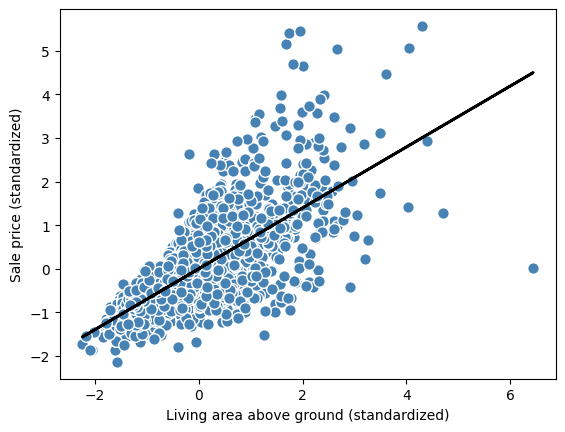

In [21]:
lin_regplot(X_train_std, y_train_std, est)
plt.xlabel('Living area above ground (standardized)')
plt.ylabel('Sale price (standardized)')

plt.show()

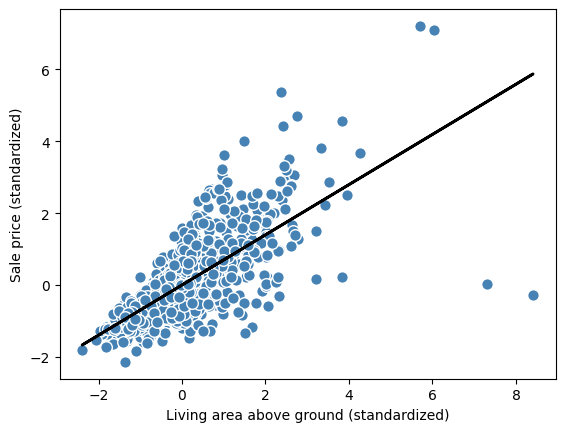

In [22]:
lin_regplot(X_test_std, y_test_std, est)
plt.xlabel('Living area above ground (standardized)')
plt.ylabel('Sale price (standardized)')

plt.show()

# Training sklearn's RandomForestRegressor on the Ames housing dataset

In [23]:
from sklearn.ensemble import RandomForestRegressor

est = RandomForestRegressor(n_estimators=1000, 
                            criterion='squared_error', 
                            random_state=1, 
                            n_jobs=-1)
est.fit(X_train_std, y_train_std)

y_train_pred = est.predict(X_train_std)
y_test_pred = est.predict(X_test_std)

print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train_std, y_train_pred),
        mean_squared_error(y_test_std, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train_std, y_train_pred),
        r2_score(y_test_std, y_test_pred)))

MSE train: 0.211, test: 0.670
R^2 train: 0.789, test: 0.348


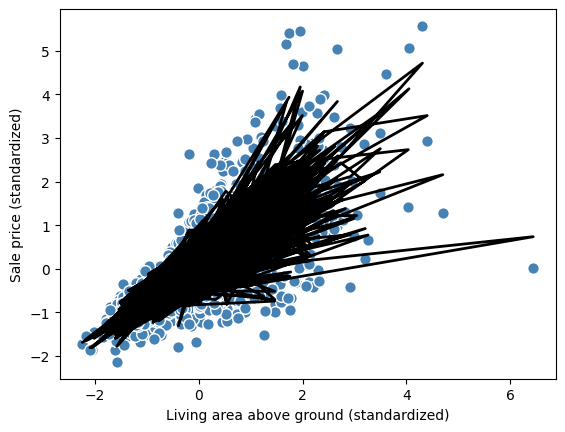

In [24]:
lin_regplot(X_train_std, y_train_std, est)
plt.xlabel('Living area above ground (standardized)')
plt.ylabel('Sale price (standardized)')

plt.show()

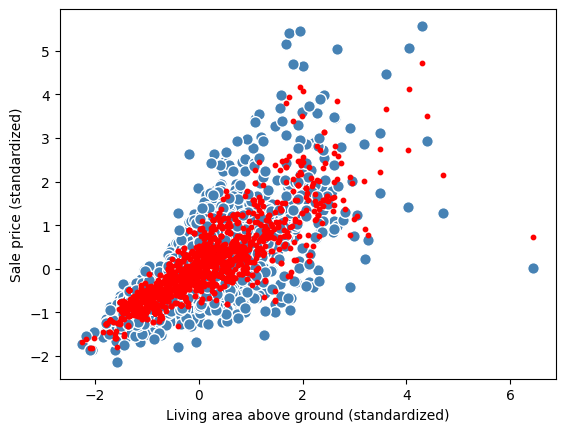

In [25]:
def nonlin_regplot(X, y, model):
    plt.scatter(X, y, c='steelblue', edgecolor='white', s=70)
    plt.scatter(X, model.predict(X), color='red', s=10)    
    return 

nonlin_regplot(X_train_std, y_train_std, est)
plt.xlabel('Living area above ground (standardized)')
plt.ylabel('Sale price (standardized)')

plt.show()


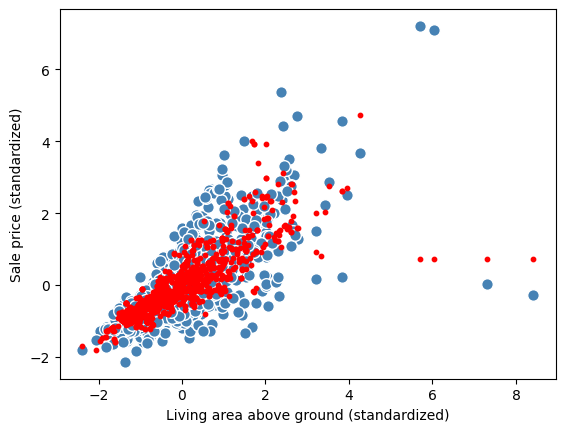

In [26]:
nonlin_regplot(X_test_std, y_test_std, est)
plt.xlabel('Living area above ground (standardized)')
plt.ylabel('Sale price (standardized)')

plt.show()
